In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
# MNIST images -->> Tensors
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root='/Dataset', train=True, download = True, transform=transform)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /Dataset/MNIST/raw/train-images-idx3-ubyte.gz to /Dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /Dataset/MNIST/raw/train-labels-idx1-ubyte.gz to /Dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /Dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to /Dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /Dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Dataset/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
test_data = datasets.MNIST(root='/Dataset', train=False, download = True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [ ]:
train_data[0]

In [10]:
image, label = train_data[0]

In [11]:
image.shape

torch.Size([1, 28, 28])

In [12]:
label

5

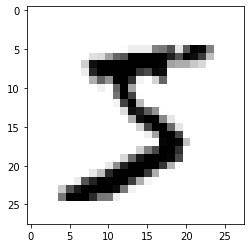

In [13]:
plt.imshow(image.reshape(28,28),cmap='gist_yarg') 

In [14]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100 , shuffle=True)
test_loader = DataLoader(test_data,batch_size=500, shuffle=False)

In [15]:
from torchvision.utils import make_grid

#np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [16]:
#First batch

for images, label in train_loader:
  break


In [19]:
class MyMulilaerPerceptron(nn.Module):
  # 1st HL 120, 2nd HL 84
  # 10 classes (output size)
  def __init__(self, input_size = 28*28, out_sz =10, layers=[120,84]):
    super().__init__()

    self.fc1 = nn.Linear(input_size, layers[0])  # input layer to H1
    self.fc2 = nn.Linear(layers[0], layers[1]) # H1 to H2
    self.fc3 = nn.Linear(layers[1], out_sz)  # H2 to output layer

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    
    return F.log_softmax(X, dim=1) # Multiclass classification



In [20]:
torch.manual_seed(101)
model = MyMulilaerPerceptron()
model

MyMulilaerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
# ANN to CNN
for params in model.parameters():
  print(params.numel())

94080
120
10080
84
840
10


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [30]:
images.shape

torch.Size([100, 1, 28, 28])

In [31]:
images.view(100, -1).shape

torch.Size([100, 784])

In [63]:
import time
start_time = time.time()

#Training

epochs = 1

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):

    b += 1
    y_pred = model(X_train.view(100,-1))
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr


    optimizer.zero_grad()
    loss.backward() #back prop
    optimizer.step() #update params

    if b%200 ==0:
      accuracy = trn_corr.item()*100 / (100*b)
      print(f'Epoch {i} batch:{b} loss:{loss.item()} accuracy:{accuracy}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test.view(500,-1))

      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted==y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)








total_time = time.time() - start_time
print(f'Duration {total_time/60} mins')

Streaming output truncated to the last 5000 lines.
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -4.7541e-04,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -3.0279e-05,  0.0000e+00]),
indices=tensor([5, 7, 7, 1, 2, 0, 0, 9, 8, 6, 2, 1, 8, 1, 5, 3, 8, 4, 7, 8, 6, 2, 1, 5,
        5, 6, 9, 0, 1, 2, 3, 8, 6, 2, 5, 9, 1, 5, 2, 8, 5, 6, 8, 0, 6, 1, 8, 8,
        2, 3, 0, 9, 7, 8, 6, 2, 7, 6, 8, 0, 6, 6, 6, 7, 9, 6, 9, 9, 9, 2, 9, 0,
        0, 5, 4, 6, 9, 9, 5, 0, 3, 2, 9, 8, 0, 6, 0, 0, 1, 9, 9, 5, 8, 9, 8, 3,
        5, 5, 1, 6]))
torch.return_types.max(
values=tensor([ 0.0000e+00,  0.0000e+00, -4.5533e-02, -1.9669e-05,  0.0000e+00,
        -4.9412e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.6226e-06,
         0.0000e+00, -7.1526e-07,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -9.1791e-06,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -5.9605e-07,  0.0000e+00, -3.5763e-07,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e

KeyboardInterrupt: ignored

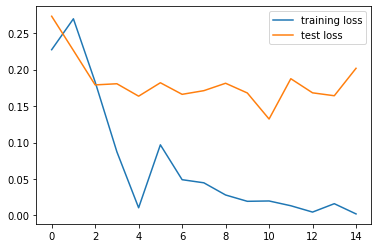

In [42]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [46]:
train_accuracy = [t/600 for t in train_correct]

In [47]:
train_accuracy

[tensor(99.6200),
 tensor(99.5717),
 tensor(99.7133),
 tensor(99.6983),
 tensor(99.7200),
 tensor(99.7367),
 tensor(99.7417),
 tensor(99.7567),
 tensor(99.7000),
 tensor(99.7783)]

In [48]:
test_accuracy = [t/100 for t in test_correct]

In [49]:
test_accuracy

[tensor(97.7500),
 tensor(97.5100),
 tensor(97.7000),
 tensor(97.7200),
 tensor(97.6300),
 tensor(97.9300),
 tensor(97.6300),
 tensor(97.6800),
 tensor(97.3500),
 tensor(97.6100)]

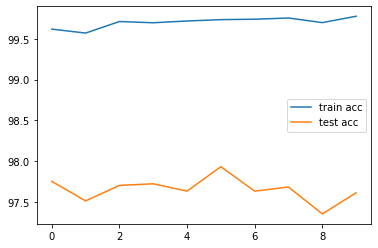

In [50]:
plt.plot(train_accuracy, label= 'train acc')
plt.plot(test_accuracy, label= 'test acc')
plt.legend()

In [51]:
#New unseen data

test_load_all = DataLoader(test_data, batch_size = 10000, shuffle=False)

In [56]:
100*correct.item()/len(test_data) #test set accuracy

97.61